In [1]:
%load_ext rqalpha
%matplotlib inline

In [2]:
#%%rqalpha -h

### 使用 %%rqalpha 进行回测

[2018-03-16 08:53:28.013632] WARN: system_log: Missing Chinese fonts. Fallback to English.


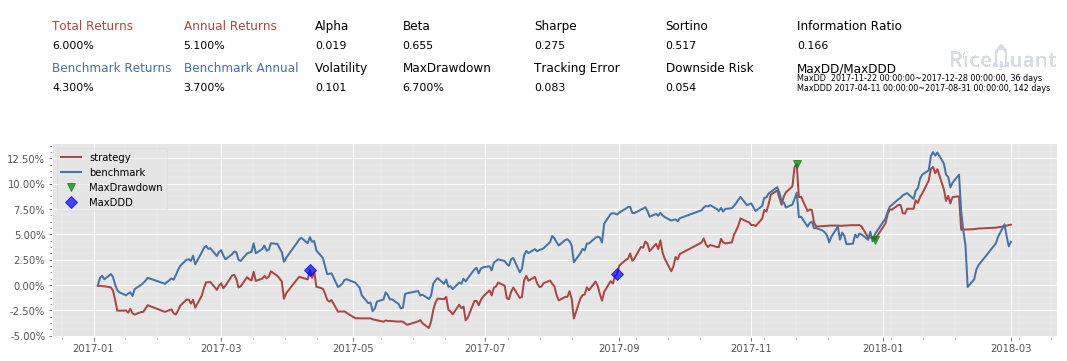

In [4]:
%%rqalpha -s 20170101 -e 20180301 -p -bm 000001.XSHG --account stock 100000

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']
    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')

    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]

    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        #logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

### 使用run_func进行回测

[2018-03-16 08:55:58.265999] WARN: system_log: Missing Chinese fonts. Fallback to English.


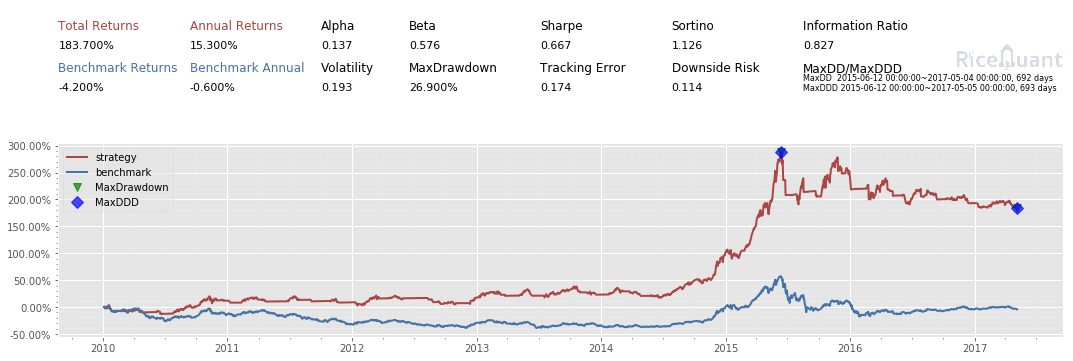

In [8]:
config = {
  "base": {
    "start_date": "2010-01-01",
    "end_date": "2017-05-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}

from rqalpha.api import *
from rqalpha import run_func

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')

    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]

    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)

results = run_func(init=init, handle_bar=handle_bar, config=config)

In [12]:
report = results["sys_analyser"]
report["trades"][:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2010-01-04 15:00:00,79.961424,1521161083,122.34,817,000012.XSHG,1521160459,None,BUY,国债指数,0,2010-01-04 15:00:00,79.961424
2010-01-06 15:00:00,79.948352,1521161084,122.32,817,000012.XSHG,1521160460,None,SELL,国债指数,0,2010-01-06 15:00:00,79.948352
2010-01-06 15:00:00,76.444704,1521161085,4550.28,21,000905.XSHG,1521160461,None,BUY,中证500,0,2010-01-06 15:00:00,76.444704
2010-01-07 15:00:00,74.913888,1521161086,4459.16,21,000905.XSHG,1521160462,None,SELL,中证500,0,2010-01-07 15:00:00,74.913888
2010-01-07 15:00:00,78.180552,1521161087,122.31,799,000012.XSHG,1521160463,None,BUY,国债指数,0,2010-01-07 15:00:00,78.180552


In [14]:
report.keys()

dict_keys(['stock_positions', 'summary', 'portfolio', 'stock_account', 'trades', 'benchmark_portfolio'])